# **IMPORTS**

---

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
import os

In [166]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import linregress
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn

In [167]:
import sklearn, pandas, numpy, matplotlib, seaborn, xgboost

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas: {pandas.__version__}")
print(f"Numpy: {numpy.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {seaborn.__version__}")
print(f"XGBoost: {xgboost.__version__}")

Scikit-learn: 1.5.1
Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2
XGBoost: 3.0.2


```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [168]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [169]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [170]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [171]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [172]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [173]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [174]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [175]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **PREPARING THE DATA**

---

This should be done at previous notebook, but since we want to take advantage of models such as XGBR for handling outliers, we will do it here for comprehension in the process.

## Column drops

We saw before that there are some values that we don't actually need for our model. Let's drop them.

In [176]:
drop_cols= ["op_setting_3", "sensor_measure_1", "sensor_measure_5", 
            "sensor_measure_10", "sensor_measure_16", "sensor_measure_18", 
            "sensor_measure_19"]

In [177]:
X= FD001_train.drop(["RUL", "max_cycle"] + drop_cols, axis=1)
y= FD001_train["RUL"]

In [178]:
X_train= FD001_train.drop(["RUL", "max_cycle"] + drop_cols, axis=1)
y_train= FD001_train["RUL"]

In [179]:
X_test= FD001_test.drop(["RUL", "max_cycle"] + drop_cols, axis=1)
y_test= FD001_test["RUL"]

## Normalization

In [180]:
# Knowing the sensors we want to normalize, we'll create a mask to apply to the data.

# We create a mask to apply RobustScaler to the data, the rest will be normalized with MinMaxScaler.
sensors_to_standardize= ["sensor_measure_2", "sensor_measure_3", "sensor_measure_4", 
                         "sensor_measure_7", "sensor_measure_8", "sensor_measure_9", 
                         "sensor_measure_11", "sensor_measure_12", "sensor_measure_13"]

In [181]:
# Robust Scaler

op_settings_columns= ["op_setting_1", "op_setting_2"]

preprocessor= ColumnTransformer(
  [
    ('sensors', RobustScaler(), sensors_to_standardize),
    ('op_settings', MinMaxScaler(feature_range=(-1, 1)), op_settings_columns),
  ],
  remainder= "passthrough"
)

# **BASELINE MODELS**

---

In [182]:
def train_eval(model, name, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  # Model predictions
  y_pred_train= model.predict(X_train)
  y_pred_test=  model.predict(X_test)

  # Metrics on train
  mae_train=  mean_absolute_error(y_train, y_pred_train)
  rmse_train= root_mean_squared_error(y_train, y_pred_train)
  mse_train=  mean_squared_error(y_train, y_pred_train)
  r2_train=   r2_score(y_train, y_pred_train)

  # Metrics on test
  mae_test=  mean_absolute_error(y_test, y_pred_test)
  rmse_test= root_mean_squared_error(y_test, y_pred_test)
  mse_test=  mean_squared_error(y_test, y_pred_test)
  r2_test=   r2_score(y_test, y_pred_test)

  print(f"--- {name} TRAIN ---")
  print("MAE:",  mae_train)
  print("RMSE:", rmse_train)
  print("MSE:",  mse_train)
  print("R2:",   r2_train)

  print(f"\n--- {name} TEST ---")
  print("MAE:",  mae_test)
  print("RMSE:", rmse_test)
  print("MSE:",  mse_test)
  print("R2:",   r2_test)

  # Scatter Test
  plt.figure(figsize=(12, 4))
  plt.scatter(y_test, y_pred_test, color= "black", alpha= .2)
  m, b=   np.polyfit(y_test, y_pred_test, 1)
  plt.plot(y_test, m*y_test + b, color= "red")
  plt.title(f"{name} True vs Predicted (Test set)")
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.grid(True, alpha=0.8)
  plt.show()

## No data normalization models

In [183]:
# Random Forest Regressor model
rfr_model= RandomForestRegressor(random_state=69)

# XGB Regressor model
xgbr_model= XGBRegressor(random_state=69)

# KNN Regressor model
knnr_model= KNeighborsRegressor()

In [184]:
# Ridge Regression model
ridge_model= Ridge()

# Lasso Regression model
lasso_model= Lasso()

# Support Vector Regression model
svr_model= SVR()

## Data normalization pipelines

In [185]:
# Random Forest Pipeline for normalizing data
rfr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [186]:
# XGB Regressor Pipeline for normalizing data
xgbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [187]:
# KNN Regressor pipeline for normalizing data
knnr_pipeline= Pipeline([
  ('scaler', preprocessor),
  ('knnr', KNeighborsRegressor())
])

In [188]:
# Ridge Pipeline for normalizing data
ridge_pipeline= Pipeline([
  ("preprocessor", preprocessor),
  ("regressor", Ridge())
])

In [189]:
# Lasso Pipeline for normalizing data
lasso_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("lasso", Lasso())
])


In [190]:
# SVR Pipeline for nromalizing data
svr_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("svr", SVR())
])

## Training

### Random Forest Regressor

--- RFR TRAIN ---
MAE: 3.676814017740294
RMSE: 5.558398322379584
MSE: 30.895791910232177
R2: 0.9934878916271962

--- RFR TEST ---
MAE: 27.085365760537567
RMSE: 40.08340607248487
MSE: 1606.6794423717167
R2: 0.6921759710869495


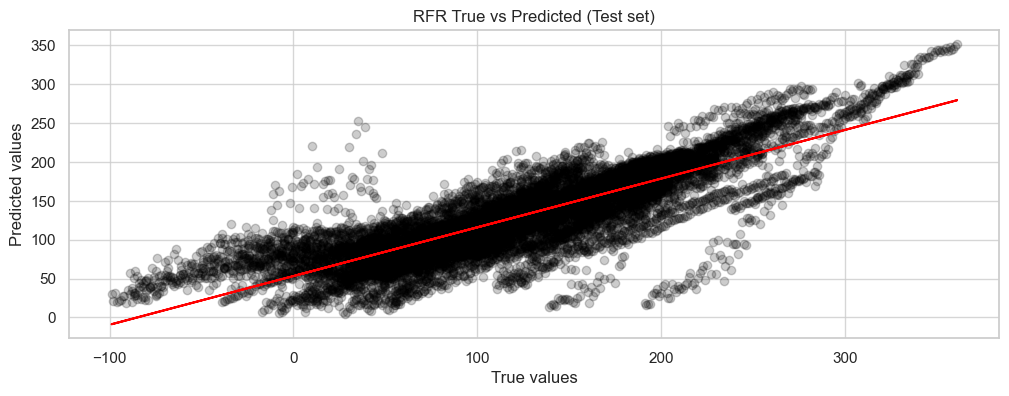

In [191]:
train_eval(rfr_model, "RFR", X_train, X_test, y_train, y_test)

--- RFR Pipeline TRAIN ---
MAE: 3.6550448354418115
RMSE: 5.502645840431085
MSE: 30.279111245213517
R2: 0.9936178734491117

--- RFR Pipeline TEST ---
MAE: 26.848449908368966
RMSE: 39.91058134254853
MSE: 1592.8545031001831
R2: 0.694824693908572


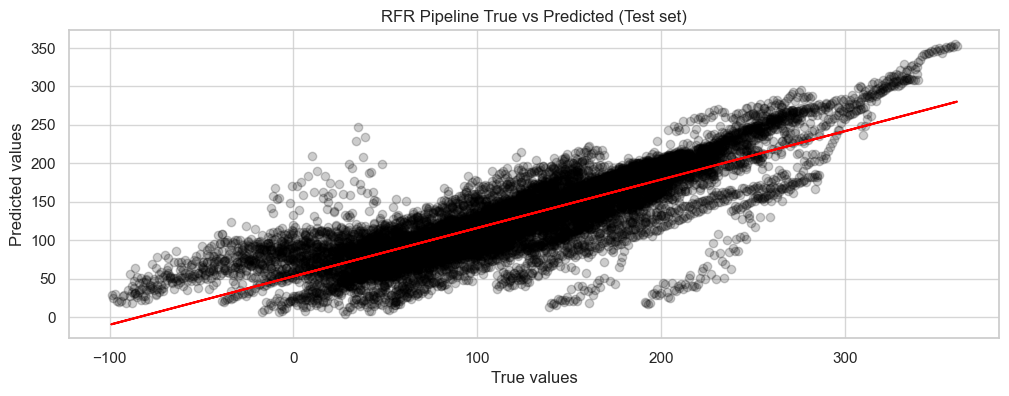

In [192]:
train_eval(rfr_pipeline, "RFR Pipeline", X_train, X_test, y_train, y_test)

### XGB Regressor

--- XGBR TRAIN ---
MAE: 4.353277861153985
RMSE: 5.903192133373237
MSE: 34.847677363519665
R2: 0.9926549196243286

--- XGBR TEST ---
MAE: 21.33318076154391
RMSE: 30.576351485132633
MSE: 934.9132701423725
R2: 0.8208798170089722


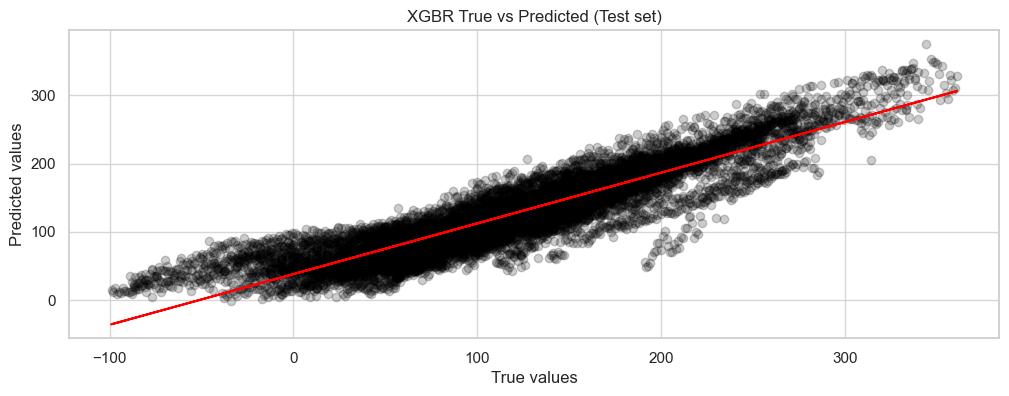

In [193]:
train_eval(xgbr_model, "XGBR", X_train, X_test, y_train, y_test)

--- XGBR Pipeline TRAIN ---
MAE: 4.353277861153985
RMSE: 5.903192133373237
MSE: 34.847677363519665
R2: 0.9926549196243286

--- XGBR Pipeline TEST ---
MAE: 21.369253084250136
RMSE: 30.624478677106005
MSE: 937.8586942445204
R2: 0.8203154802322388


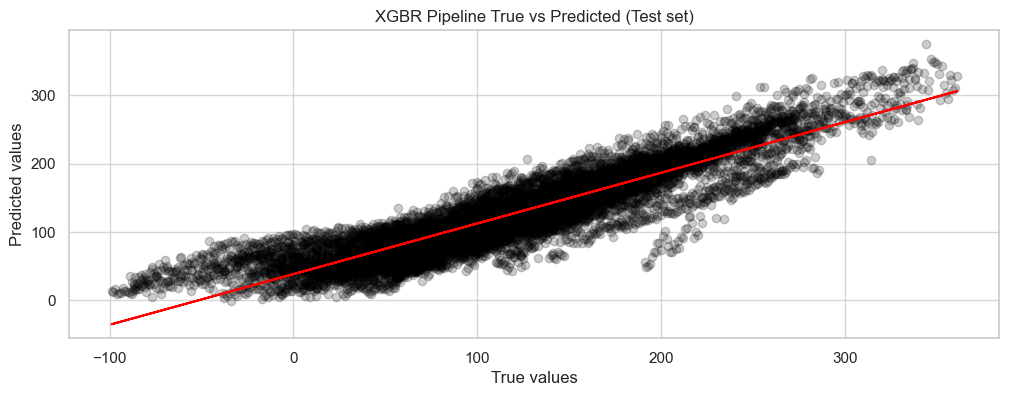

In [194]:
train_eval(xgbr_pipeline, "XGBR Pipeline", X_train, X_test, y_train, y_test)

### KNN Regressor

--- KNNR TRAIN ---
MAE: 15.1531190926276
RMSE: 25.057365157581824
MSE: 627.8715486403955
R2: 0.8676594022633775

--- KNNR TEST ---
MAE: 39.37623701893708
RMSE: 52.45159754976293
MSE: 2751.1700855222966
R2: 0.47290278470208746


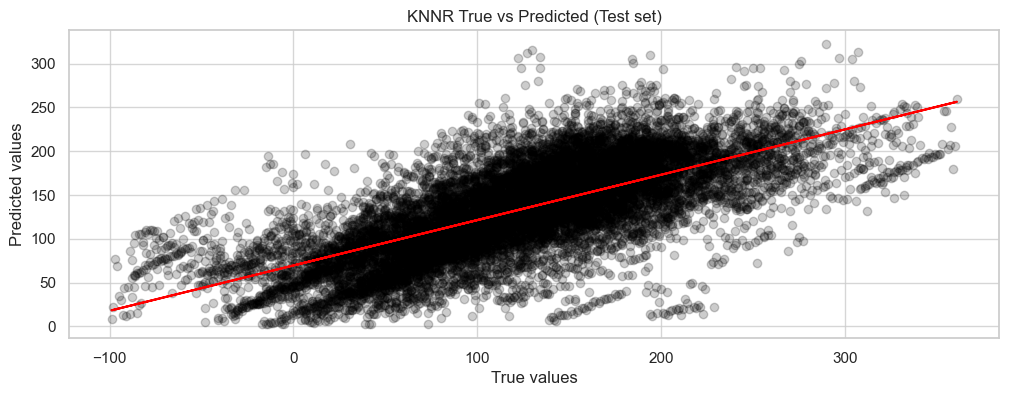

In [195]:
train_eval(knnr_model, "KNNR", X_train, X_test, y_train, y_test)

--- KNNR Pipeline TRAIN ---
MAE: 13.90202123018758
RMSE: 23.93604046727305
MSE: 572.934033250933
R2: 0.8792389421239587

--- KNNR Pipeline TEST ---
MAE: 36.45615455100794
RMSE: 50.9955644758697
MSE: 2600.547596212584
R2: 0.501760576917183


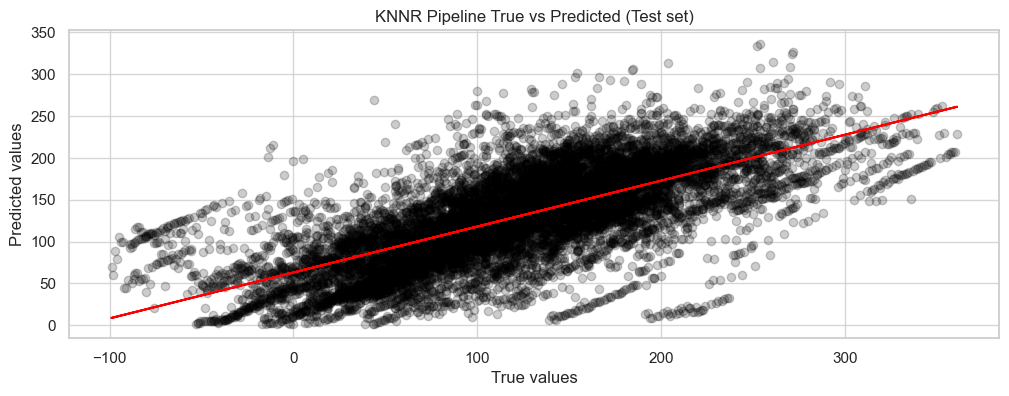

In [196]:
train_eval(knnr_pipeline, "KNNR Pipeline", X_train, X_test, y_train, y_test)

### Ridge Regression

--- Ridge TRAIN ---
MAE: 30.481939995260404
RMSE: 39.5928055542852
MSE: 1567.5902516594367
R2: 0.6695887377602296

--- Ridge TEST ---
MAE: 43.62479411425559
RMSE: 54.52864785023985
MSE: 2973.373436375467
R2: 0.43033080121007594


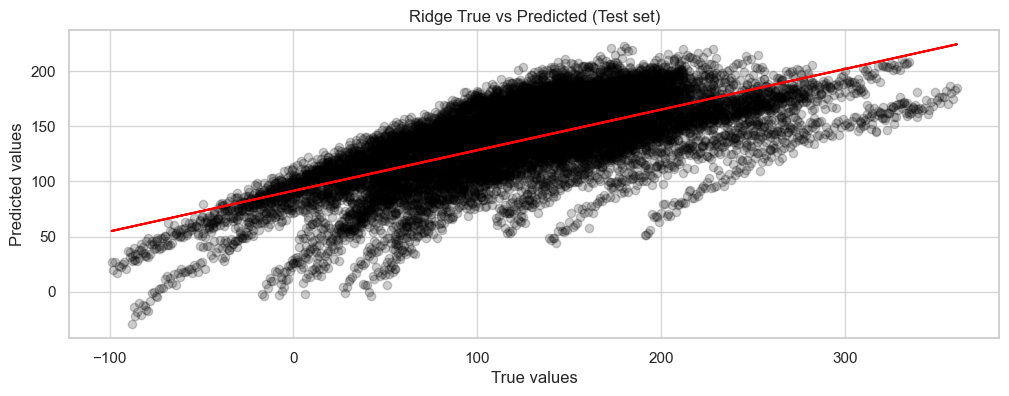

In [197]:
train_eval(ridge_model, "Ridge", X_train, X_test, y_train, y_test)

--- Ridge Pipeline TRAIN ---
MAE: 30.476121124648767
RMSE: 39.58518997833959
MSE: 1566.9872656212372
R2: 0.6697158330759753

--- Ridge Pipeline TEST ---
MAE: 43.63005672857785
RMSE: 54.53166868289106
MSE: 2973.7028893406014
R2: 0.4302676812519869


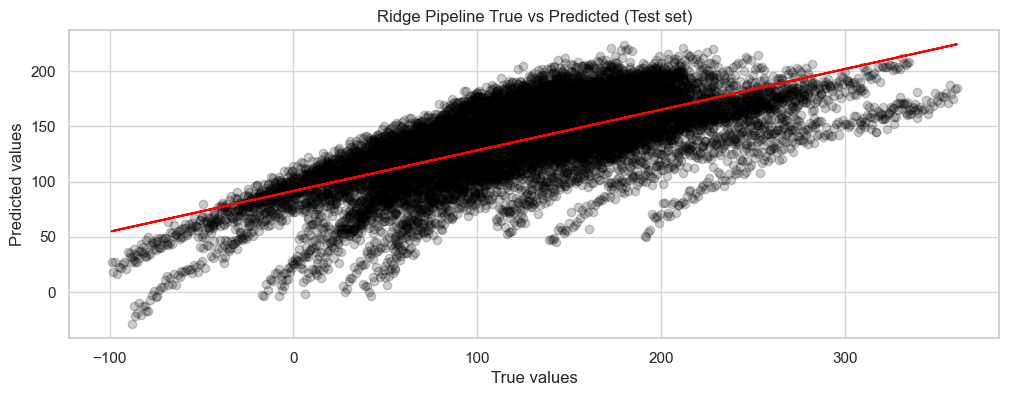

In [198]:
train_eval(ridge_pipeline, "Ridge Pipeline", X_train, X_test, y_train, y_test)

### Lasso Regression

--- Lasso TRAIN ---
MAE: 30.88470420325302
RMSE: 40.02621578762446
MSE: 1602.0979502774776
R2: 0.6623153241591264

--- Lasso TEST ---
MAE: 43.107204166724465
RMSE: 53.86556851860859
MSE: 2901.4994718329167
R2: 0.4441011481479705


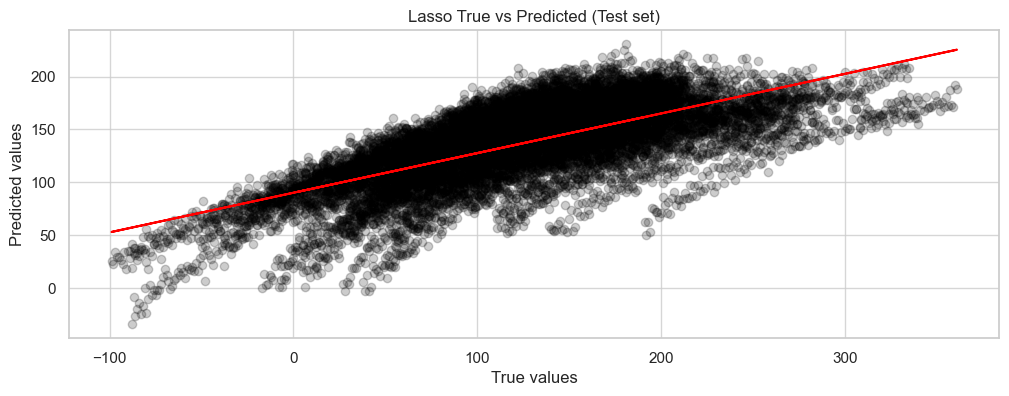

In [199]:
train_eval(lasso_model, "Lasso", X_train, X_test, y_train, y_test)

--- Lasso Pipeline TRAIN ---
MAE: 30.443502261607463
RMSE: 39.63812403045031
MSE: 1571.1808766533618
R2: 0.6688319182181225

--- Lasso Pipeline TEST ---
MAE: 43.46339919283513
RMSE: 54.49896267515792
MSE: 2970.1369326682557
R2: 0.4309508835889698


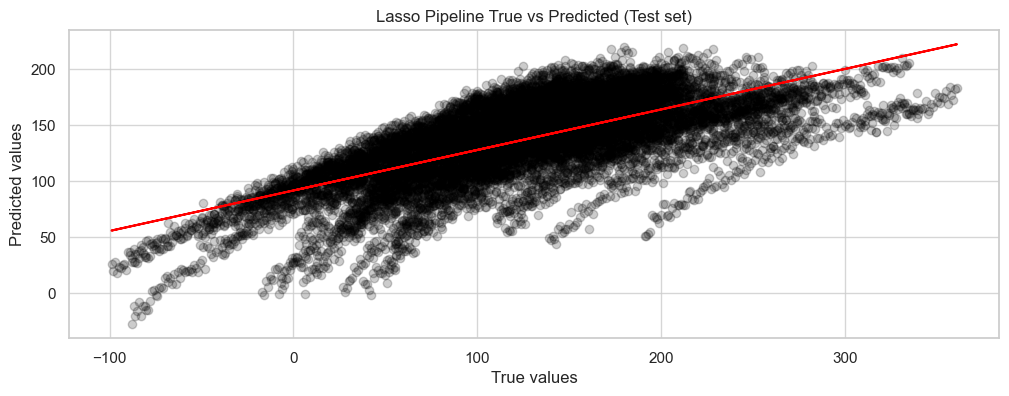

In [200]:
train_eval(lasso_pipeline, "Lasso Pipeline", X_train, X_test, y_train, y_test)

### SV Regressor

--- SVR TRAIN ---
MAE: 55.99277617978575
RMSE: 68.27087843033748
MSE: 4660.912841649918
R2: 0.017588879766982757

--- SVR TEST ---
MAE: 60.16393548335563
RMSE: 75.05167653983818
MSE: 5632.754151440497
R2: -0.0791804706317858


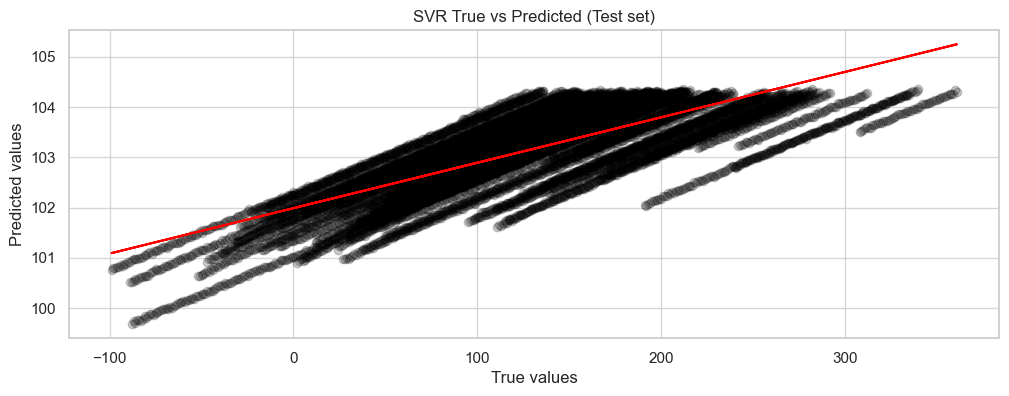

In [201]:
train_eval(svr_model, "SVR", X_train, X_test, y_train, y_test)

--- SVR Pipeline TRAIN ---
MAE: 25.628040134254128
RMSE: 37.49354872549755
MSE: 1405.7661960312587
R2: 0.7036974536215741

--- SVR Pipeline TEST ---
MAE: 42.401365685586484
RMSE: 54.47060926208292
MSE: 2967.047273382513
R2: 0.431542832016406


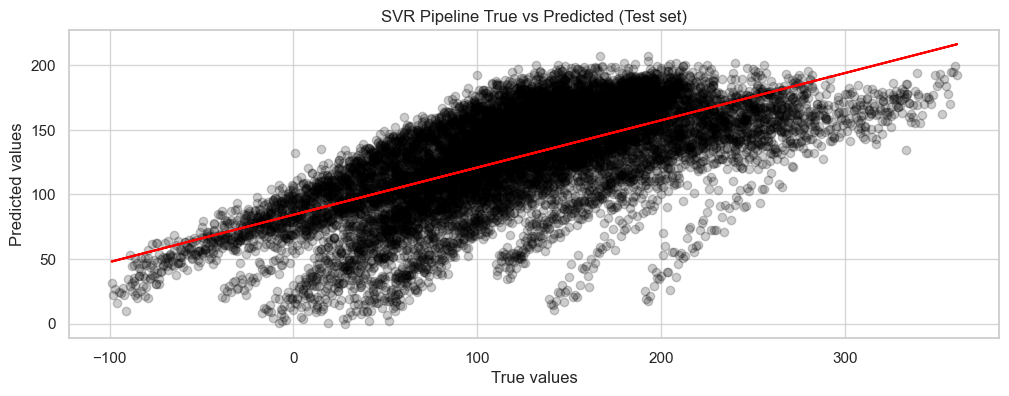

In [202]:
train_eval(svr_pipeline, "SVR Pipeline", X_train, X_test, y_train, y_test)

As a conclusion, we can see that normalizing the data does not improve the model's performance because we are using tree based models such as Random Forest Regressor and XGBoost Regressor. this normalization would be more useful for linear models, as we see in the next section.

We also detect sightly overfitting in both models, hence this is not a big issue, we're gonna treat them later tho.

## Conclusions

We can clearly see that the linear based models are not the best choice for this problem, not because are bad models but because tree based models are better for this problem; they need to generalize better, need more complexity to understand the data altough they are more complex to train and has very large amount of parameters to tune. We'll keep using tree based models instead of lienar models and trying to improve these metrics with hyperparams and feature engineering.

What we need to do? Since we are lacking of some important data that we can use to predict the RUL, we need to ensure we got some new features that actually helps our models to predict better.

1. Feature Engineering.
2. Hyperparameter Optimization.

We'll be doing that on the next notebook: [03_featureeng_fd001](03_featureeng_fd001.ipynb)